In [1]:
!pip install tensorflow==2.0.1
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 86.3MB 70kB/s 
     |████████████████████████████████| 450kB 54.8MB/s 
     |████████████████████████████████| 3.8MB 47.5MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
2.0.1


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_shape: (60000, 28, 28)


In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
])


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])



In [5]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3004 - accuracy: 0.9128 - val_loss: 0.1422 - val_accuracy: 0.9576
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1436 - accuracy: 0.9571 - val_loss: 0.1049 - val_accuracy: 0.9685
Epoch 3/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1066 - accuracy: 0.9675 - val_loss: 0.0786 - val_accuracy: 0.9754
Epoch 4/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0871 - accuracy: 0.9738 - val_loss: 0.0792 - val_accuracy: 0.9740
Epoch 5/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0738 - accuracy: 0.9762 - val_loss: 0.0764 - val_accuracy: 0.9788
Epoch 6/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0652 - accuracy: 0.9794 - val_loss: 0.0747 - val_accuracy: 0.9778
Epoch 7/10
60000/60000 [==============================] 

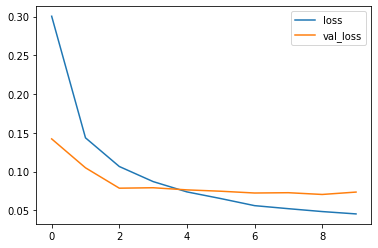

In [6]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

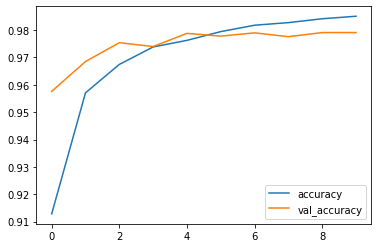

In [7]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [8]:
print(model.evaluate(x_test, y_test))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Confusion matrix, without normalization
[[ 972    1    1    2    0    1    0    1    2    0]
 [   0 1126    4    0    0    0    1    1    3    0]
 [   3    0 1017    0    3    0    2    6    1    0]
 [   0    0    4  989    0    5    0    5    2    5]
 [   1    0    3    1  966    0    3    1    2    5]
 [   2    0    0    7    1  873    1    1    5    2]
 [   8    3    1    1    6    5  930    0    4    0]
 [   1    3    9    0    1    0    0 1009    2    3]
 [   6    0    3    3    4    3    2    5  946    2]
 [   2    3    0    1    8    6    1   19    6  963]]


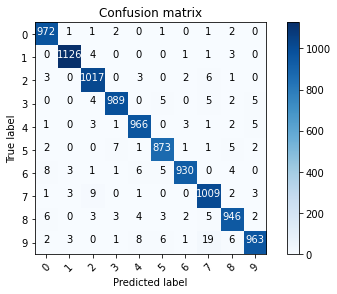

In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap= plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/ cm.sum(axis = 1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt= '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment='center',
    color='white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


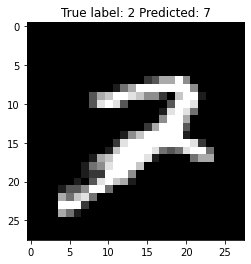

In [21]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" %(y_test[i], p_test[i]));